1. Differential Motion Analysis

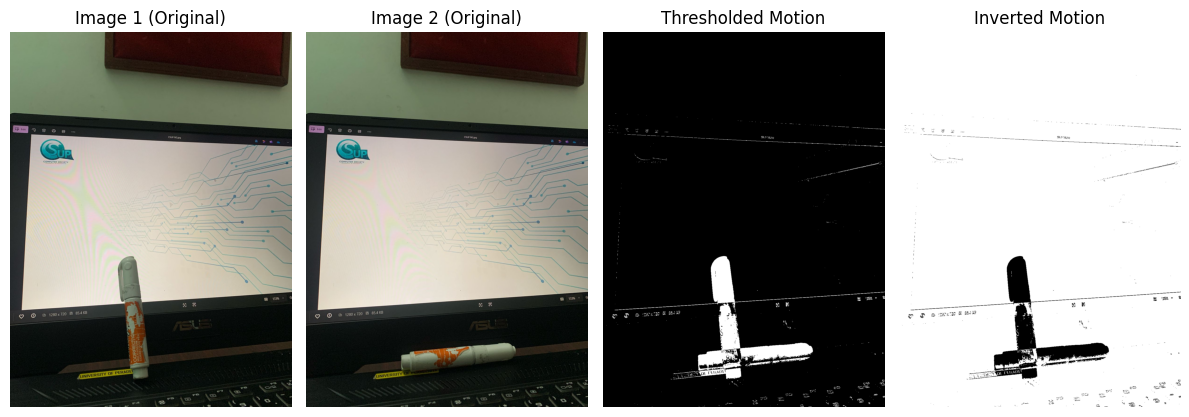

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/tipex.jpg"
    image2_path = "Images/tipexShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)


For Mutiple Objects

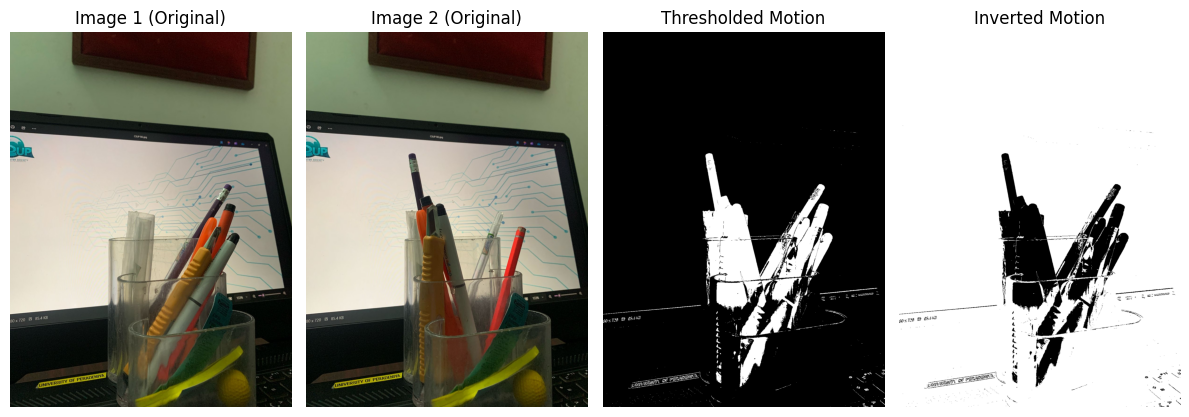

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/mulObj.jpg"
    image2_path = "Images/mulObjShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)
